# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [301]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [302]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

<div class="theme"> Overview </div> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

<div style="color: red; background: black">Please note that Question 4 and Question 7 are required for 209a students but are <strong>optional for 109a students</strong>. We include them here for your education, and we believe that if you have time to spend with them you will learn from them. But <strong>if you are in 109a, then Q4 and Q7 are completely optional</strong>. To help manage stress if you are not in 209a, we recommend skipping past these first and then coming back to them once you have finished the rest of the homework if you have time.</div>

In [303]:
#!pip install seaborn

In [304]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [305]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

<div class="theme"> Part A: k-NN and Linear Regression</div> 

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, millage, condition, etc.  

#### Data set 

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs). 
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.

<div class='exercise'><b> Question 1:   Exploratory Data Analysis (EDA) [10 pts]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data. 
</div>

## Solutions 

<div class='exercise-r'>  
 
**1.1** Which variables are quantitative, and which are categorical?
 
 </div>

# your code here
Categorical = Year
Quantitative = current selling price, maximum retail price, number of kilometers

<div class='exercise-r'>  
 
**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`?
 
 </div>

In [306]:
# name your variables mean_csp, mean_mrp, std_csp, std_mrp

filename = "data/car_dekho_full.csv"

df = pd.read_csv(filename)


mean_csp = df['Current_Selling_Price'].mean()
mean_mrp = df['MRP'].mean()
std_csp = df['Current_Selling_Price'].std()
std_mrp = df['MRP'].std()
display(df)
# your code here
print(mean_csp)
print(mean_mrp)
print(std_csp)
print(std_mrp)

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000
...,...,...,...,...
596,2016,8.75,8.89,20273
597,2012,3.10,5.98,51439
598,2007,0.12,0.58,53000
599,2016,5.05,5.70,4293


4.393078202995008
6.911552412645592
4.518314989263966
6.4801209562526685


<div class='exercise-r'>  
 
**1.3** What is the range of Kilometers that the cars have?
 
 </div>

In [307]:
# your code here
max_km = df['Kms_Driven'].max()
min_km = df['Kms_Driven'].min()

range = max_km - min_km
range

212500

<div class='exercise-r'>  
 
**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`?
 
 
 Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.
 </div>

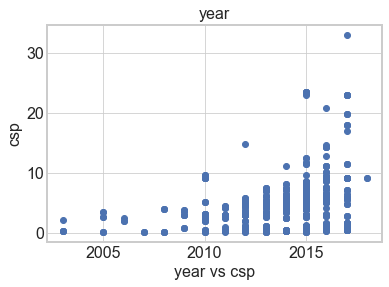

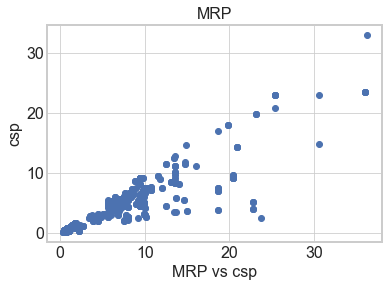

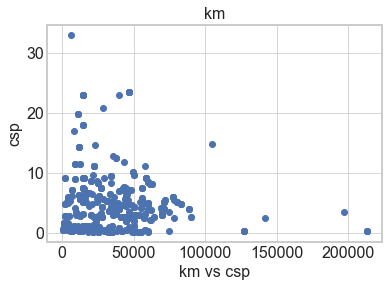

In [308]:
# your code here

csp = df['Current_Selling_Price']
mrp = df['MRP']
km = df['Kms_Driven']
year = df['Year']


fig, ax = plt.subplots()
ax.plot(year,csp,'o')
ax.set_xlabel('year vs csp')
ax.set_ylabel('csp')
ax.set_title('year');

fig, ay = plt.subplots()
ay.plot(mrp,csp,'o')
ay.set_xlabel('MRP vs csp')
ay.set_ylabel('csp')
ay.set_title('MRP');

fig, az = plt.subplots()
az.plot(km,csp,'o')
az.set_xlabel('km vs csp')
az.set_ylabel('csp')
az.set_title('km');

*Your answer here*
MRP

<div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b>

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.

**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

    
INSTRUCTIONS:
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots. 
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
- Find the best model based on the test $MSE$ values.
- Evaluate and report the $R^2$ of the best model.

**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

- How does the value of $k$ affect the fitted model?

- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
    
    </div>

### Solutions

<div class='exercise-r'>  
 
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
 
 
 INSTRUCTIONS:
 - Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.
 - Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$.
 - Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
 - Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
 - Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
 - Find the best model based on the test $MSE$ values.
 - Evaluate and report the $R^2$ of the best model.
 
 </div>

In [309]:
#Choosing your predictor and response variable
from pandas import *
# your code here
x = mrp
y = csp
data = DataFrame({'mrp': mrp, 'csp': csp})
data

,mrp,csp
0,5.70,5.25
1,13.70,3.51
2,1.05,0.31
3,7.60,2.10
4,0.57,0.20
...,...,...
596,8.89,8.75
597,5.98,3.10
598,0.58,0.12
599,5.70,5.05


In [310]:
##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
sim_train_data, sim_test_data = train_test_split(data, train_size=0.75, random_state = 109)



<Figure size 1440x1440 with 0 Axes>

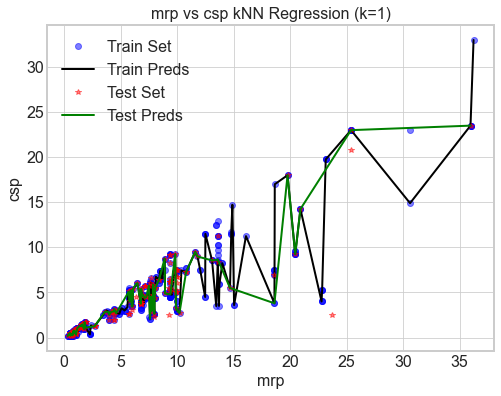

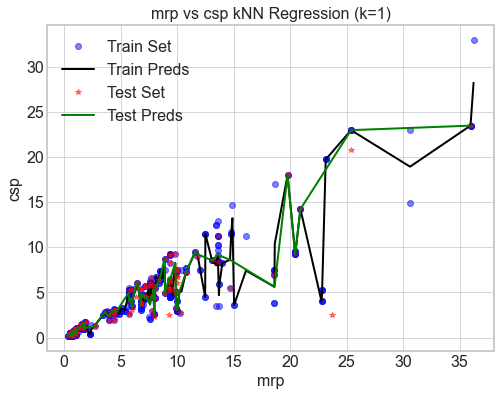

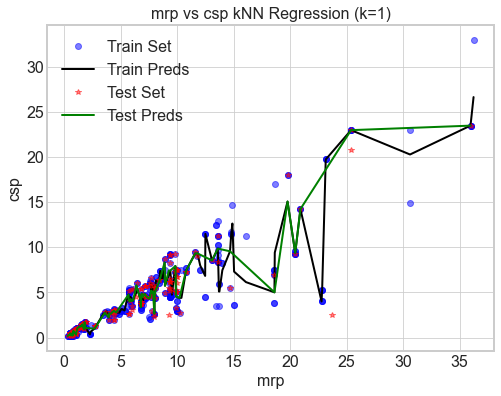

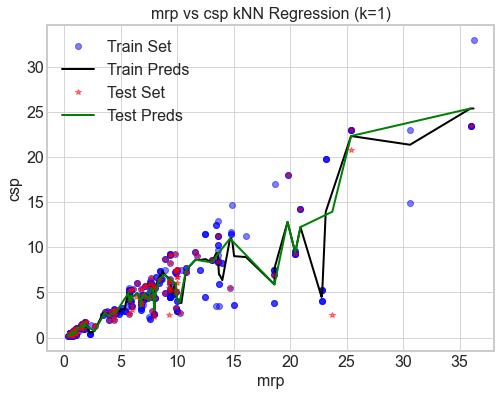

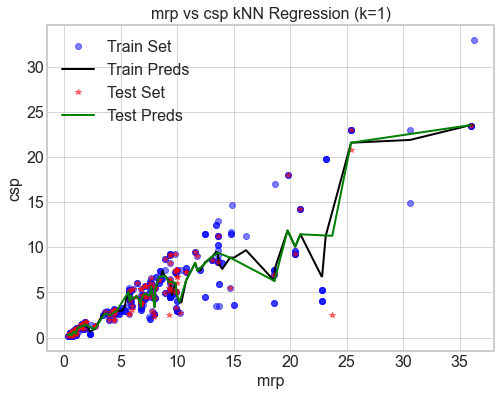

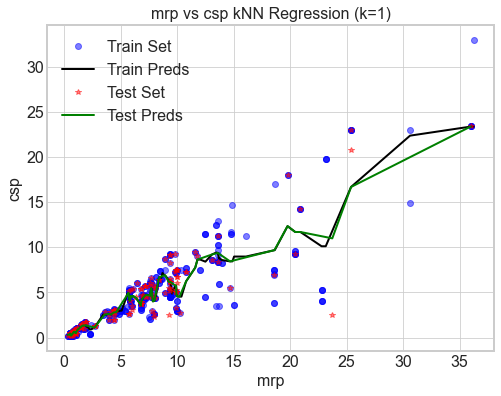

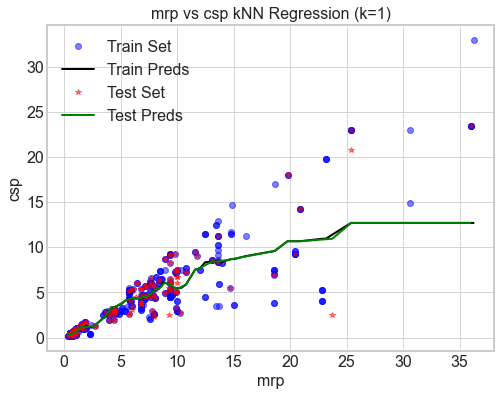

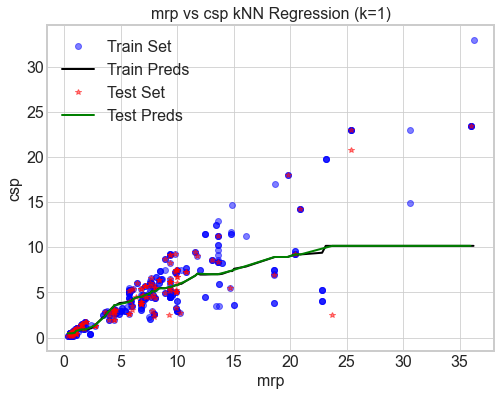

In [311]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
# your code here 
counter  = 0
i = 1

fig = plt.figure(figsize = (20,20))

def knn_model(k, train_data, test_data):
    
    # First, we create the classifier object:
    neighbors = KNeighborsRegressor(n_neighbors=k)
    #fit the data
    neighbors.fit(train_data[['mrp']], train_data['csp'])
    #sort 
    sorted_train = train_data.sort_values(['mrp'])
    sorted_test = test_data.sort_values(['mrp'])
    # Retrieve our predictions:
    train_preds = neighbors.predict(sorted_train[['mrp']])
    test_preds = neighbors.predict(sorted_test[['mrp']])
    
    
    return sorted_train, sorted_test, train_preds, test_preds

    
def plot_predictions_same_plot(k, train_data,test_data, train_preds, test_preds, counter, i):
    
    # plot all results on same plot
    plt.figure(figsize = [8,6])
    plt.plot(train_data['mrp'], train_data['csp'], 'bo', alpha = 0.5, label = 'Train Set' )
    plt.plot(train_data['mrp'], train_preds, 'k-', linewidth = 2, markersize = 10, label = 'Train Preds')
    plt.plot(test_data['mrp'], test_data['csp'], 'r*', alpha = 0.5, label = 'Test Set' )
    plt.plot(test_data['mrp'], test_preds, 'g-', linewidth = 2, markersize = 10, label = 'Test Preds')
    plt.xlabel('mrp')
    plt.ylabel('csp')
    plt.title("mrp vs csp kNN Regression (k=1)".format(k))
    plt.legend()
        
    counter = counter + 1
    i = i+1
    plt.show()
    
    return
#for the life of me I could not figure out how to get these into the proper formation of subplots took an hour trying 

for k in [1,2,3,5,7,10,50,100]:
    sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds = knn_model(k, sim_train_data,sim_test_data)
    plot_predictions_same_plot(k,sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds, counter, i)
    
    

In [313]:
sim_sorted_test

,mrp,csp
368,0.32,0.18
49,0.48,0.30
447,0.51,0.45
223,0.54,0.40
143,0.55,0.40
281,0.55,0.50
204,0.57,0.25
51,0.58,0.30
198,0.58,0.12
423,0.64,0.40


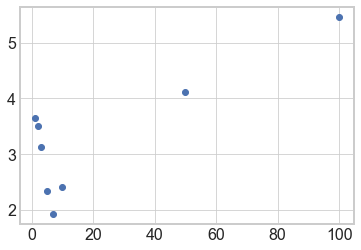

In [314]:
# Now make MSE plots
mse_values = []

def evaluate(k, predicted, true):
    
    #Find the squared error:
    squared_error = (predicted- true['csp'])**2
    
    #Finding the mean squared error:
    mse = squared_error.sum()/len(predicted)
    
    
    
    return mse
# your code here

for k in [1,2,3,5,7,10,50,100]:
    sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds = knn_model(k, sim_train_data,sim_test_data)
    mse_values.append(evaluate(k, sim_test_preds, sim_sorted_test))

k_values = [1,2,3,5,7,10,50,100]
data = DataFrame({'K': k_values, 'MSE': mse_values})

fig, ax = plt.subplots()
ax.plot(data['K'],data['MSE'],'o')

In [315]:
# Find the best model

print("Optimal k value:", k_values[data['MSE'].idxmin()])
print('Corresponding MSE:',data['MSE'][data['MSE'].idxmin()])


Optimal k value: 7
Corresponding MSE: 1.9218710771725909


In [316]:
##Compute the R-squared for the best model
#finding r^2


def evaluate_r(k, predicted, true):
    
    #Find the squared error:
    squared_error = (predicted- true['csp'])**2
    
    #Finding the mean squared error:
    error_var = squared_error.sum()
    sample_var = ((true['csp'] - true['csp'].mean())**2).sum()
    r = (1 - (error_var / sample_var))
    
    
    return r
# your code here
k=7
sim_sorted_train, sim_sorted_test, sim_train_preds, sim_test_preds = knn_model(k, sim_train_data,sim_test_data)
print("R^2 Score of kNN test:", evaluate(k, sim_test_preds, sim_sorted_test))


# your code here


R^2 Score of kNN test: 1.9218710771725909


<div class='exercise-r'>  
 
**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
 
 - How does the value of $k$ affect the fitted model?
 
 - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
 
 - Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
 
 - Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
 
 </div>

*Your answer here*

k affects the flexibility of our models. We are created less flexible models as we increase our k-values and potentially ovefitting. K=n will fit exactly to our training set and not be flexible if k = n. Our MSE decrease for training, while test will be concave. This is because we get closer to correct modeling then we start to get away from a representative model as we begin to overfit. Random seed should result different values because we are selecting a different random split each time we select a different number. 


<div class='exercise'><b> Question 3:  Simple Linear Regression [25 pts]</b>

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
- Run a Linear Regression model.
- Report the slope/coefficient and intercept values for the fitted linear model.
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 

- What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
    </div>


### Solutions

<div class='exercise-r'>  
 
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
 
 - You will use the same 75% training and 25% testing split of the data, using the same random_state = 109.
 - Run a Linear Regression model.
 - Report the slope/coefficient and intercept values for the fitted linear model.
 - Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
 - Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.
 
 **Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
 
 </div>

In [322]:
# Prepare your data
filename = "data/car_dekho_full.csv"

sim_df = pd.read_csv(filename)
display(sim_df)
sim_df = sim_df.drop(columns = ['Year','Kms_Driven'])
                     
sim_df = sim_df.sort_values(['MRP','Current_Selling_Price'])
display(sim_df)

x_train, x_test, y_train, y_test = train_test_split(sim_df['MRP'], sim_df['Current_Selling_Price'], test_size = 0.25)

display(x_train)
print('Break')
display(y_train)
display(x_test)


,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000
...,...,...,...,...
596,2016,8.75,8.89,20273
597,2012,3.10,5.98,51439
598,2007,0.12,0.58,53000
599,2016,5.05,5.70,4293


,Current_Selling_Price,MRP
217,0.18,0.32
368,0.18,0.32
456,0.18,0.32
532,0.18,0.32
49,0.30,0.48
...,...,...
331,23.50,35.96
511,23.50,35.96
524,23.50,35.96
574,23.50,35.96


98      9.400
378     1.500
418     7.130
24     10.790
173    13.600
182     4.430
302     0.580
128     9.850
461     5.900
298     9.400
122     4.890
161     9.940
52      5.900
323     5.800
309     1.170
512     4.410
532     0.320
498     0.750
346     6.950
194     0.820
449     0.950
394     0.880
207    13.740
68     14.680
197     1.600
561     7.850
527     0.550
179    25.390
534     0.800
0       5.700
596     8.890
233     1.750
49      0.480
87      3.460
354     0.870
355     3.600
571     9.400
218    10.790
520     1.470
431     0.550
118    22.830
39      8.930
478    30.610
555     7.000
453    10.790
191     8.400
388     9.900
390     6.790
350     3.980
230     0.800
352     3.600
30      5.710
339     4.430
117    20.910
434     6.800
416     0.520
278    36.230
157    10.000
595     0.810
262     0.520
188    18.610
437     9.400
132    13.600
516    13.090
322     0.570
260    20.450
94      9.400
61      5.700
589     7.270
413     0.740
475     0.750
96    

Break


98      9.10
378     1.15
418     5.75
24      7.25
173     8.40
182     2.90
302     0.30
128     7.25
461     4.00
298     8.25
122     2.65
161     7.50
52      5.25
323     4.00
309     1.05
512     2.90
532     0.18
498     0.20
346     4.75
194     0.75
449     0.90
394     0.50
207     5.90
68      5.50
197     1.45
561     4.75
527     0.40
179    23.00
534     0.60
0       5.25
596     8.75
233     0.90
49      0.30
87      2.50
354     0.75
355     2.85
571     5.20
218     7.25
520     1.11
431     0.45
118     5.25
39      4.90
478    14.90
555     3.65
453     7.25
191     6.00
388     3.25
390     3.75
350     2.55
230     0.75
352     2.85
30      4.90
339     2.75
117    14.25
434     3.95
416     0.25
278    33.00
157     4.10
595     0.42
262     0.48
188     6.95
437     4.50
132    10.25
516     8.55
322     0.20
260     9.65
94      4.80
61      5.15
589     4.50
413     0.65
475     0.20
96      4.75
81      0.60
466     1.20
476     6.70
9       4.65
8       0.35

524    35.960
223     0.540
40      8.060
26      9.400
190    10.000
562     0.950
50      5.900
72      0.640
248     1.170
544     1.820
424     0.870
125    10.790
67      9.400
292     1.500
235     9.400
468     1.170
134     0.810
228    13.600
337     0.950
211     1.470
579    18.610
553     7.130
348     1.170
585     1.470
10      4.430
154     2.690
328     9.400
523     4.990
63      6.760
450     1.470
241     0.810
376     0.520
136     2.370
270    22.780
313     9.900
560    11.600
3       7.600
274     8.010
160     0.730
244     6.870
291     7.700
55      9.400
331    35.960
237    18.610
69      7.600
296     5.900
398    20.910
37     13.460
164     1.900
428    13.600
212     0.510
531     0.570
234    19.770
485     8.700
340     0.950
199     6.790
206    25.390
74      9.950
400     5.700
540     7.980
256    35.960
156    14.000
318    11.800
356    13.090
103    10.210
147    18.610
168     0.820
149     9.400
221     5.900
397     0.990
287    30.610
47    

In [323]:
## Fit a linear model to the train data
# your code here
from sklearn.linear_model import LinearRegression

lr_sklearn = LinearRegression().fit(x_train.values.reshape(-1,1), y_train) # x data must be 2D array


In [324]:
## Report the slope/coefficient and intercept values for the fitted linear model. 
# your code here
print('Coefficients:', lr_sklearn.coef_)
print('Intercept:', lr_sklearn.intercept_)

Coefficients: [0.62830526]
Intercept: 0.10499460499057012


In [325]:
## Report the $MSE$ and $R^2$ from the training and test sets.
# your code here 
y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

print("MSE Train: {:.3f}".format(mean_squared_error(y_train, y_preds_train)))
print("MSE Test: {:.3f}".format(mean_squared_error(y_test, y_preds_test)))

# R^2 score
print("R^2 Train: {:.3f}".format(r2_score(y_train, y_preds_train)))
print("R^2 Test: {:.3f}".format(r2_score(y_test, y_preds_test)))


MSE Train: 3.853
MSE Test: 5.723
R^2 Train: 0.796
R^2 Test: 0.768


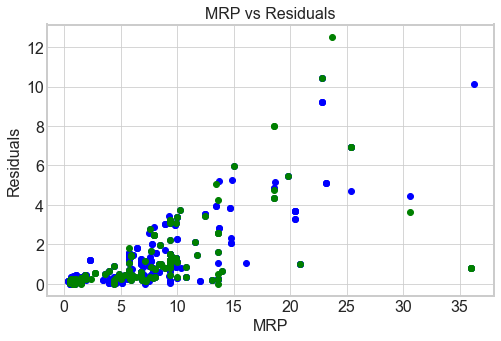

In [326]:
## Plot the **residuals** 
# your code here
residuals_train = abs(y_preds_train - y_train)
residuals_test = abs(y_preds_test - y_test)
plt.figure(figsize = [8,5])
plt.scatter(x_train, residuals_train, c="blue", marker='o', label="train data")
plt.scatter(x_test, residuals_test, c="green", marker='o', label="train data")

plt.xlabel('MRP')
plt.ylabel('Residuals')
plt.title('MRP vs Residuals')
plt.show()

<div class='exercise-r'>  
 
**3.2** Discuss your results by answering the following questions.
 
 - How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
 
 - What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?
 
 - Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
 </div>

*Your answer here*

MSE for KNN is lower. This makes sense since the kNN method is more adaptable and can better fit the data than a straight line can. This data is not very linear as you get to the higher end of MRP which contributes to this effect.

<div class='exercise'><b> Question 4 (for 209a students, optional for others):  Linear Regression with Feature engineering [10 pts]</b>

**4.1** Creating a new variable from existing data: percentage depreciation

Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 

Our previous regression model relates the Current selling price to the MRP of the car with the equation:

$$CSP = \beta_0 + \beta_1*MRP$$

However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car. 

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the percentage depreciation of the Current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
Create a new column in your dataframe for `perc`
    
    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs.

a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?

b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?

c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 

d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?

**4.3** Perform additional EDA 

Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.

**4.4** Fitting a Linear Regression model

Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).

- Again, use the same split train-test sets with training data of 75% and testing data of 25%
- Fit a Linear Regression model for each of the predictors.
- Predict the model for the train and test data
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
- Report the $MSE$ score from the training and test sets.
- Find the best model i.e. the best predictor based on the $MSE$ of each model.

**4.5** Predicting The Current Selling Price using ```perc``` 

After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
    
 </div>

## Solutions

<div class='exercise-r'>  
 
**4.1** Creating a new variable from existing data: percentage depreciation
 
 Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data.
 
 Our previous regression model relates the Current selling price to the MRP of the car with the equation:
 
 $$CSP = \beta_0 + \beta_1*MRP$$
 
 However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car.
 
 Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
 
 From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)).
 
 Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.
 
 Define the percentage depreciation of the Current selling price to the MRP as follows:
 
 $$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
 
 Create a new column in your dataframe for `perc`
 
 
 </div>

In [327]:
# your code here
df['perc'] = (df['MRP']-df['Current_Selling_Price'])/(df['MRP'])

#b = (1,45,3,2,21,5,65,23,2,5,56)
#plt.hist(b,bins,color='#B5DBFF',rwidth=0.8,alpha=0.8,edgecolor='black', linewidth=1.2,orientation='horizontal')

In [328]:
df

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649
...,...,...,...,...,...
596,2016,8.75,8.89,20273,0.016
597,2012,3.10,5.98,51439,0.482
598,2007,0.12,0.58,53000,0.793
599,2016,5.05,5.70,4293,0.114


<div class='exercise-r'>  
 
**4.2** Exploratory Data Analysis
 
 For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
 
 Answer the following questions by plotting graphs.
 
 a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?
 
 b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
 
 c) Does there seem to be a relationship between `Kms_Driven` and `perc` ?
 
 d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
 
 </div>

a)

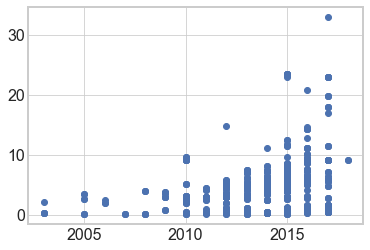

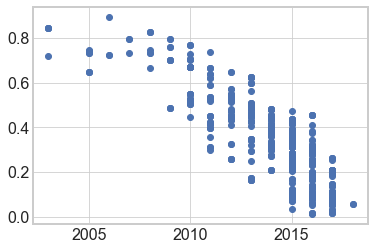

In [329]:
# your code here
plt.scatter(df['Year'],df['Current_Selling_Price'])
plt.show()
plt.scatter(df['Year'],df['perc'])

*Your answer here*
The relationship is not the same, year and current selling price have a position, somewhat linear relationship while year and perc have a negative and somewhat linear relationship. However the relationships do highly affect one another. The positive linear relationshop of current selling price and year is what causes the negative relationship in the year vs perc graph. 

b)

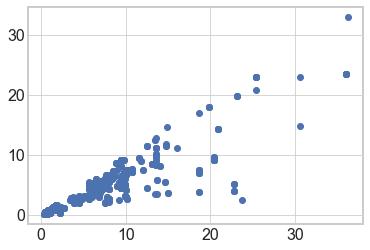

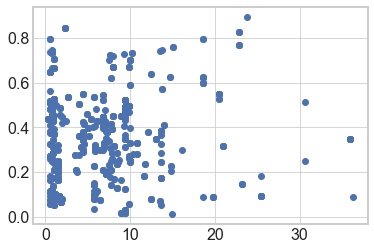

In [330]:
# your code here
plt.scatter(df['MRP'],df['Current_Selling_Price'])
plt.show()
plt.scatter(df['MRP'],df['perc'])

*Your answer here*
there doesn't seem to be much correlation between the two, however perc is directly influenced by selling price

c)

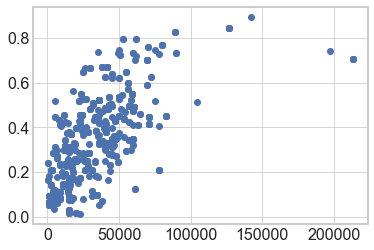

In [331]:
# your code here
plt.scatter(df['Kms_Driven'],df['perc'])

d)

*Your answer here* -> c
There seems to be a positive linear relationship, with lots of variation, between Kms_driven and perc

*Your answer here*
You could use several things, kms driven and current selling price seem like they would both have positive linear prediction lines 

<div class='exercise-r'>  
 
**4.3** Perform additional EDA
 
 Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.
 
 </div>

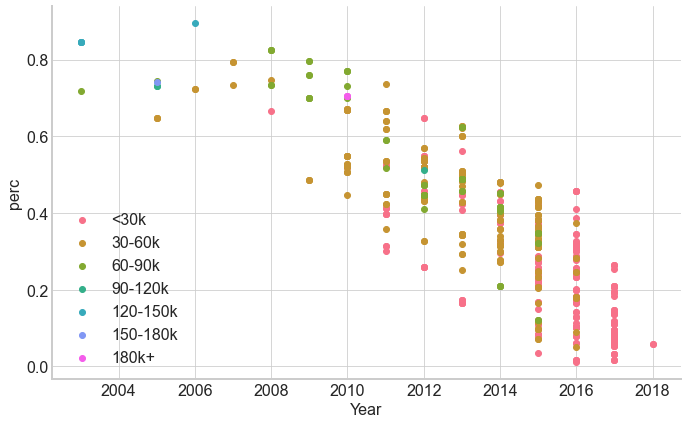

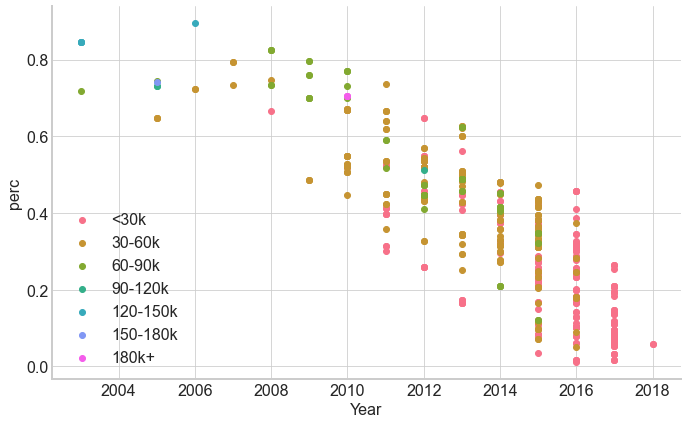

In [332]:
# your code here
newdf = df.copy()

newdf['bins'] = np.int64(df.Kms_Driven/30000)

bins = newdf.bins.unique()

bins.sort()

fg = sns.FacetGrid(data= newdf, hue = 'bins',hue_order = bins,
                  height = 6, aspect = 1.61)
fg.map(plt.scatter, 'Year','perc')
plt.legend(['<30k','30-60k','60-90k','90-120k','120-150k','150-180k','180k+'],loc='lower left');

newdf['bins'] = np.int64(df.Kms_Driven/30000)

bins = newdf.bins.unique()

bins.sort()

fg = sns.FacetGrid(data= newdf, hue = 'bins',hue_order = bins,
                  height = 6, aspect = 1.61)
fg.map(plt.scatter, 'Year','perc')
plt.legend(['<30k','30-60k','60-90k','90-120k','120-150k','150-180k','180k+'],loc='lower left');

<div class='exercise-r'>  
 
**4.4** Fitting a Linear Regression model
 
 Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).
 
 - Again, use the same split train-test sets with training data of 75% and testing data of 25%
 - Fit a Linear Regression model for each of the predictors.
 - Predict the model for the train and test data
 - Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
 - Report the $MSE$ score from the training and test sets.
 - Find the best model i.e. the best predictor based on the $MSE$ of each model.
 
 </div>

Coefficients: [0.62830526]
Intercept: 0.10499460499057012
MSE train:16.34500677369353
R^2 train:-425.0583650199687
MSE train:9.779074782869532
R^2 train:-286.05206308738116


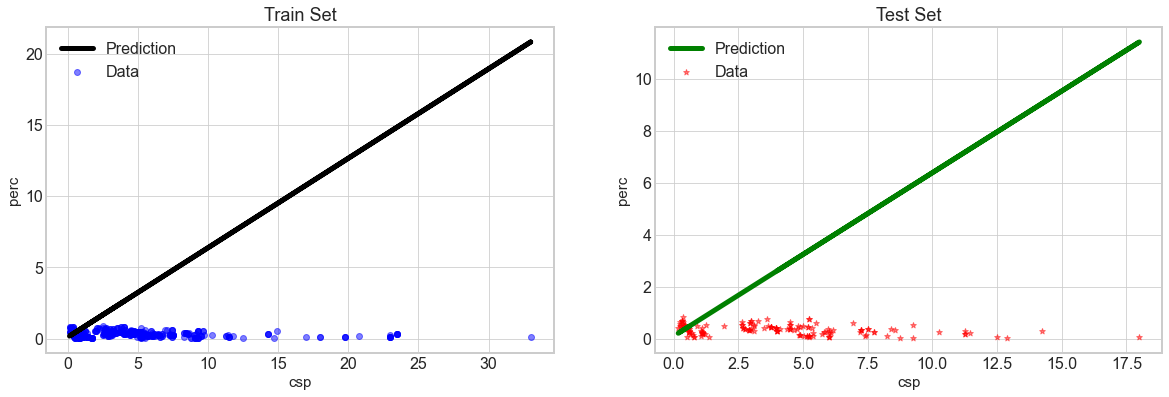

In [333]:
# your code here

from sklearn.linear_model import LinearRegression
train_data, test_data = train_test_split(df, test_size = 0.25, random_state=42)

x_train = train_data['Current_Selling_Price']
y_train = train_data['perc']
x_test = test_data['Current_Selling_Price']
y_test = test_data['perc']

y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

print('Coefficients:', lr_sklearn.coef_)
print('Intercept:', lr_sklearn.intercept_)
# plot predictions
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes = axes.ravel()

axes[0].scatter(x_train, y_train, color = 'b', alpha = 0.5, label = 'Data')
axes[0].plot(x_train, y_preds_train, 'k', linewidth = 5, label = 'Prediction')
axes[0].set_title('Train Set', fontsize = 18)
axes[0].legend()
axes[0].set_xlabel('csp', fontsize = 15)
axes[0].set_ylabel('perc', fontsize = 15)

axes[1].scatter(x_test, y_test, color = 'r',marker='*', alpha = 0.5, label = 'Data')
axes[1].plot(x_test, y_preds_test, 'g', linewidth = 5, label = 'Prediction')
axes[1].set_title('Test Set', fontsize = 18)
axes[1].legend()
axes[1].set_xlabel('csp', fontsize = 15)
axes[1].set_ylabel('perc', fontsize = 15)
 
#Find the squared error:
squared_error = (y_preds_train - y_train)**2
    
    #Finding the mean squared error:
mse = squared_error.sum()/len(y_train)

    #Finding the mean squared error:
error_var = squared_error.sum()
sample_var = ((y_train - y_train.mean())**2).sum()
r2 = (1 - (error_var / sample_var))

#begin test area
squared_error = (y_preds_test - y_test)**2
mse_test = squared_error.sum()/len(y_test)
error_var = squared_error.sum()
sample_var = ((y_test - y_test.mean())**2).sum()
r2_test = (1 - (error_var / sample_var))

print(f"MSE train:{mse}")
print(f'R^2 train:{r2}')
print(f"MSE train:{mse_test}")
print(f'R^2 train:{r2_test}')


Coefficients: [0.62830526]
Intercept: 0.10499460499057012
MSE train:36.302963119317745
R^2 train:-945.2939554659833
MSE train:24.15007954083923
R^2 train:-707.8942778171557


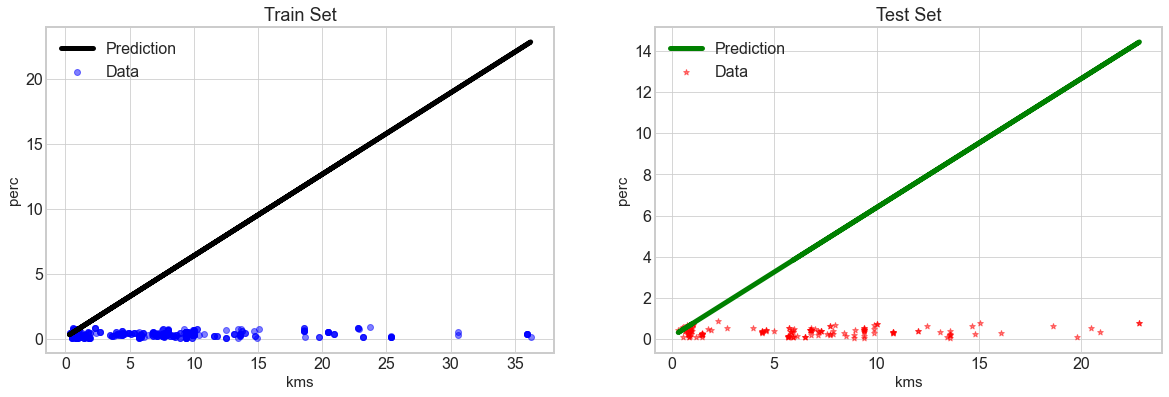

In [334]:
# your code here
y_test = test_data['perc']

y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))

from sklearn.linear_model import LinearRegression
train_data, test_data = train_test_split(df, test_size = 0.25, random_state=42)

x_train = train_data['MRP']
y_train = train_data['perc']
x_test = test_data['MRP']
y_test = test_data['perc']

y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

print('Coefficients:', lr_sklearn.coef_)
print('Intercept:', lr_sklearn.intercept_)
# plot predictions
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes = axes.ravel()

axes[0].scatter(x_train, y_train, color = 'b', alpha = 0.5, label = 'Data')
axes[0].plot(x_train, y_preds_train, 'k', linewidth = 5, label = 'Prediction')
axes[0].set_title('Train Set', fontsize = 18)
axes[0].legend()
axes[0].set_xlabel('kms', fontsize = 15)
axes[0].set_ylabel('perc', fontsize = 15)

axes[1].scatter(x_test, y_test, color = 'r',marker='*', alpha = 0.5, label = 'Data')
axes[1].plot(x_test, y_preds_test, 'g', linewidth = 5, label = 'Prediction')
axes[1].set_title('Test Set', fontsize = 18)
axes[1].legend()
axes[1].set_xlabel('kms', fontsize = 15)
axes[1].set_ylabel('perc', fontsize = 15)
 
#Find the squared error:
squared_error = (y_preds_train - y_train)**2
    
    #Finding the mean squared error:
mse = squared_error.sum()/len(y_train)

    #Finding the mean squared error:
error_var = squared_error.sum()
sample_var = ((y_train - y_train.mean())**2).sum()
r2 = (1 - (error_var / sample_var))

#begin test area
squared_error = (y_preds_test - y_test)**2
mse_test = squared_error.sum()/len(y_test)
error_var = squared_error.sum()
sample_var = ((y_test - y_test.mean())**2).sum()
r2_test = (1 - (error_var / sample_var))

print(f"MSE train:{mse}")
print(f'R^2 train:{r2}')
print(f"MSE train:{mse_test}")
print(f'R^2 train:{r2_test}')

Coefficients: [0.62830526]
Intercept: 0.10499460499057012
MSE train:1600500.393130935
R^2 train:-41719564.501109354
MSE train:1600378.8883537268
R^2 train:-46977046.606606476


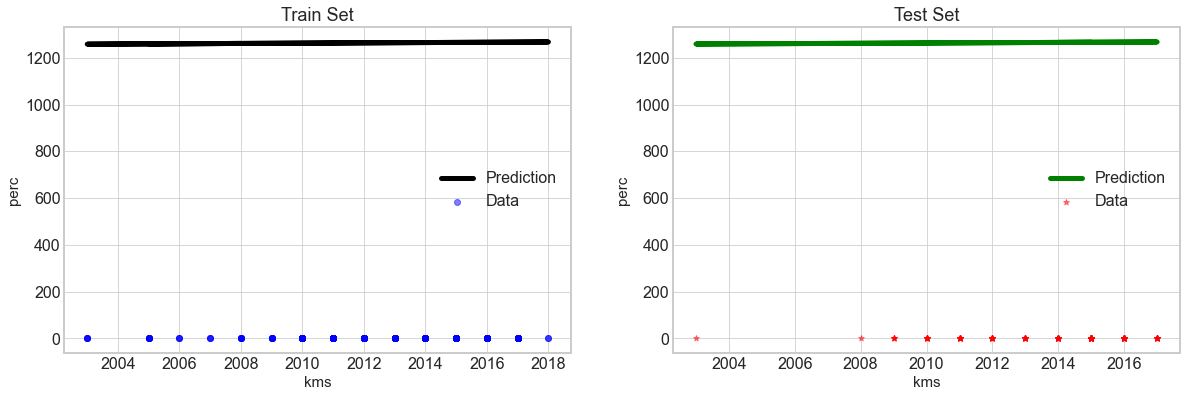

In [335]:
# your code here
# your code here
y_test = test_data['perc']

y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))

from sklearn.linear_model import LinearRegression
train_data, test_data = train_test_split(df, test_size = 0.25, random_state=42)

x_train = train_data['Year']
y_train = train_data['perc']
x_test = test_data['Year']
y_test = test_data['perc']

y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

print('Coefficients:', lr_sklearn.coef_)
print('Intercept:', lr_sklearn.intercept_)
# plot predictions
fig, axes = plt.subplots(1,2,figsize=(20,6))
axes = axes.ravel()

axes[0].scatter(x_train, y_train, color = 'b', alpha = 0.5, label = 'Data')
axes[0].plot(x_train, y_preds_train, 'k', linewidth = 5, label = 'Prediction')
axes[0].set_title('Train Set', fontsize = 18)
axes[0].legend()
axes[0].set_xlabel('kms', fontsize = 15)
axes[0].set_ylabel('perc', fontsize = 15)

axes[1].scatter(x_test, y_test, color = 'r',marker='*', alpha = 0.5, label = 'Data')
axes[1].plot(x_test, y_preds_test, 'g', linewidth = 5, label = 'Prediction')
axes[1].set_title('Test Set', fontsize = 18)
axes[1].legend()
axes[1].set_xlabel('kms', fontsize = 15)
axes[1].set_ylabel('perc', fontsize = 15)
 
#Find the squared error:
squared_error = (y_preds_train - y_train)**2
    
    #Finding the mean squared error:
mse = squared_error.sum()/len(y_train)

    #Finding the mean squared error:
error_var = squared_error.sum()
sample_var = ((y_train - y_train.mean())**2).sum()
r2 = (1 - (error_var / sample_var))

#begin test area
squared_error = (y_preds_test - y_test)**2
mse_test = squared_error.sum()/len(y_test)
error_var = squared_error.sum()
sample_var = ((y_test - y_test.mean())**2).sum()
r2_test = (1 - (error_var / sample_var))

print(f"MSE train:{mse}")
print(f'R^2 train:{r2}')
print(f"MSE train:{mse_test}")
print(f'R^2 train:{r2_test}')

*Your answer here*
Current Sales price is slightly better than MRP but are nearly the same

<div class='exercise-r'>  
 
**4.5** Predicting The Current Selling Price using ```perc```
 
 After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
 
 </div>

# your code here
Honestly, I'm not entirely sure. Really running out of time since this assignment is needlessly long and this course is wayyyy in excess of the outlined hours it said it was. If I had to guess, its because the correlation between the variables just isn't as strong seeing as how perc is directly defined by the csp and mrp.

*Your answer here*

<div class="theme"> Part Β :  Multi-Linear Regression</div> 

### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site and given in `Income_prediction.csv'.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are less likely to hide any deeply held cultural or sociological biases or preferences in order to be perceived as being politically or socially "correct". This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias, referred to as "social desirability bias." However, the possibility of bias persists; it might be possible to imagine somebody selecting that drinking "doesn't matter" but they might still have some type of preference, unconscious or conscious. 

This is a dataset designed to help us think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as a possible relationship between bias and factors like education, local environment, or age.


<div class='exercise'><b> Question 5:   Using Data science to learn more about Indian society [25 pts]</b>

First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and the income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?

**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

**5.7** Is the income lower or high for those living in 'nuclear' families?

**5.8** What is the average effect of the 'Manglik' variable on income?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.
 
 </div>

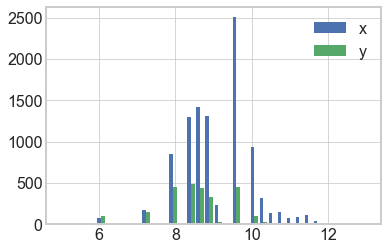

In [336]:
# your code here 
import math
filename2 = 'data/Income_prediction.csv'
df = pd.read_csv(filename2)

men_df = df.loc[df['gender']==1]
women_df = df.loc[df['gender']==0]

men_df['income'].median()
women_df['income'].median()


#ax = men_df['income'].plot.hist(bins=25, alpha=0.5)

plt.style.use('seaborn-deep')

x = np.log(men_df['income'])
y = np.log(women_df['income'])
bins = np.linspace(5, 13, 35)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

#clear disparity from looking at median alone 

#fig, ax = plt.subplots()
#ax.plot(men,'o')
#ax.set_xlabel('year vs csp')
#ax.set_ylabel('csp')
#ax.set_title('year');

# your code here
There appears to be a higher income for men. The median income also reflects what the logarithmic breakdown above shows

<div class='exercise-r'>  
 
**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.
 
 </div>

In [337]:
# your code here 
x = df['income']
y = df['eating']
df


,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,31,1,68,57,19.107,2,1,1,1,1,1,1,1,2,2,2,1,4,0,2,7500,8
3,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
4,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,28,1,70,41,12.969,4,2,1,1,0,1,1,1,4,3,1,0,4,0,3,50000,5
12351,28,1,63,61,23.822,2,1,1,1,0,1,1,1,3,3,2,1,4,0,2,10000,9
12352,22,0,64,50,18.921,2,1,1,2,0,0,1,1,3,2,1,1,6,1,1,417,4
12353,31,1,71,69,21.216,4,1,1,1,0,1,2,1,3,2,1,0,5,1,2,29167,1


In [338]:
print('test')

test


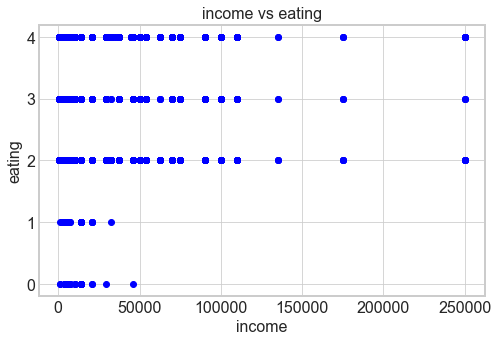

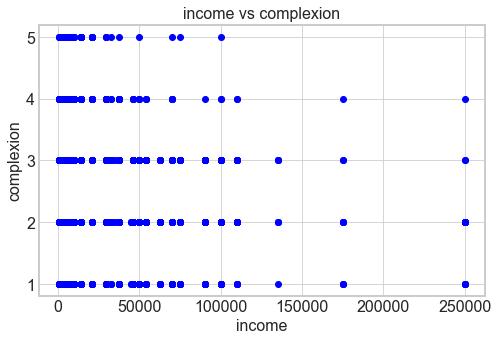

TypeError: hist() got multiple values for argument 'bins'

In [339]:

plt.figure(figsize=[8,5])
plt.scatter(x,y, c="blue", marker='o', label="train data")

plt.xlabel('income')
plt.ylabel('eating')
plt.title('income vs eating')

plt.show()

z = df['complexion']

plt.figure(figsize=[8,5])
plt.scatter(x,z, c="blue", marker='o', label="train data")

plt.xlabel('income')
plt.ylabel('complexion')
plt.title('income vs complexion')

plt.show()

plt.hist(df['income'],['eating'],bins=20)
plt.show()


There seems to be mild correlations in each case. People with higher income tend to skew towards a higher eating value. Lighter complexion tends to correlate to higher income. 

In [340]:
df

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,31,1,68,57,19.107,2,1,1,1,1,1,1,1,2,2,2,1,4,0,2,7500,8
3,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
4,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,28,1,70,41,12.969,4,2,1,1,0,1,1,1,4,3,1,0,4,0,3,50000,5
12351,28,1,63,61,23.822,2,1,1,1,0,1,1,1,3,3,2,1,4,0,2,10000,9
12352,22,0,64,50,18.921,2,1,1,2,0,0,1,1,3,2,1,1,6,1,1,417,4
12353,31,1,71,69,21.216,4,1,1,1,0,1,2,1,3,2,1,0,5,1,2,29167,1


<div class='exercise-r'>  
 
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
 
 </div>

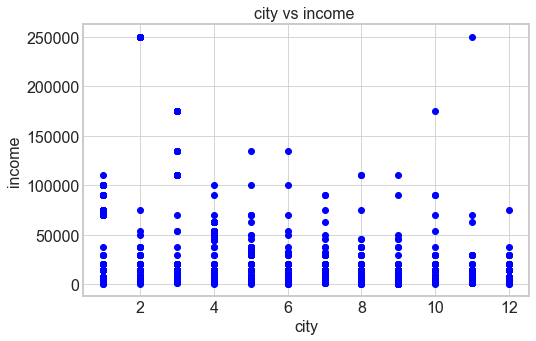

In [341]:
# your code here
y = df['income']
x = df['city']

plt.figure(figsize=[8,5])
plt.scatter(x,y, c="blue", marker='o', label="train data")

plt.xlabel('city')
plt.ylabel('income')
plt.title('city vs income ')

plt.show()


Yes different cities have varrying levels of income. There remains lots of low income individuals in each city. Some cities seem to have more ultra wealthy. 

<div class='exercise-r'>  
 
**5.4** Is there a clear trend between BMI and the income?
 
 </div>

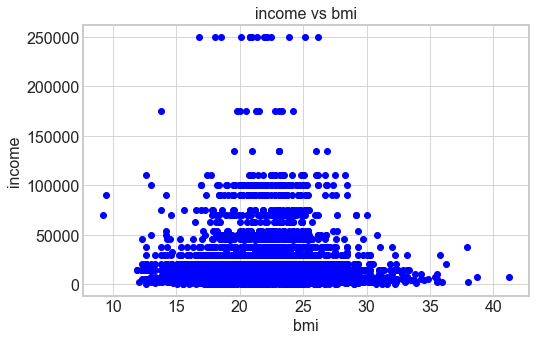

In [342]:
# your code here
z = df['bmi']

plt.figure(figsize=[8,5])
plt.scatter(z,y, c="blue", marker='o', label="train data")

plt.ylabel('income')
plt.xlabel('bmi')
plt.title('income vs bmi')

#y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
#y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

plt.show()




looks to be roughly similar median BMI across groups. More likely to be on the high or low end the lower your income is

<div class='exercise-r'>  
 
**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?
 
 </div>

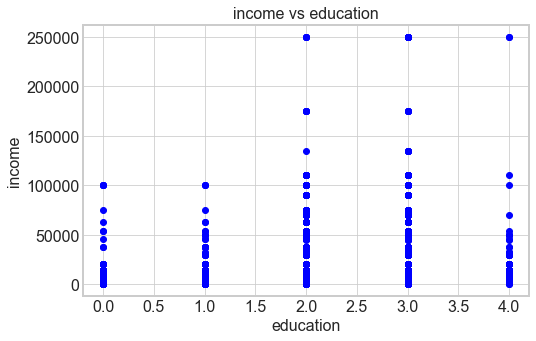

In [343]:
# your code here


z = df['education']


plt.figure(figsize=[8,5])
plt.scatter(z,y, c="blue", marker='o', label="train data")

plt.ylabel('income')
plt.xlabel('education')
plt.title('income vs education')

#y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
#y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

plt.show()



correlation goes up then generally levels off 

<div class='exercise-r'>  
 
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
 
 </div>

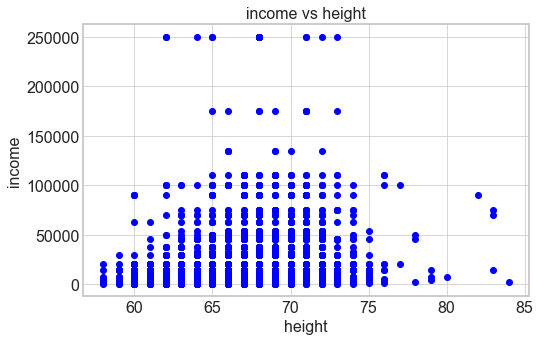

In [347]:
# your code here


z = df['height']


plt.figure(figsize=[8,5])
plt.scatter(z,y, c="blue", marker='o', label="train data")

plt.ylabel('income')
plt.xlabel('height')
plt.title('income vs height')

#y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
#y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

plt.show()


height is non linear and forms a bit of a curve. I guess you don't want to be too tall.

In [348]:
# your code here


<div class='exercise-r'>  
 
**5.7** Is the income lower or high for those living in 'nuclear' families?
 
 </div>

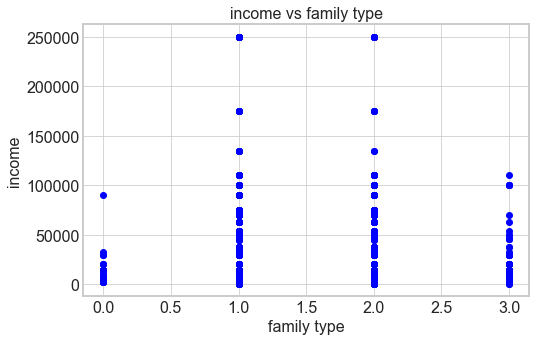

In [349]:
# your code here


z = df['family_type']


plt.figure(figsize=[8,5])
plt.scatter(z,y, c="blue", marker='o', label="train data")

plt.ylabel('income')
plt.xlabel('family type')
plt.title('income vs family type')

#y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
#y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

plt.show()


Nuclear families have the highest income since 2 is a bit of a catch all, its hard to differentiate. 2 however does seem to show a very similar income level

<div class='exercise-r'>  
 
**5.8** What is the average effect of the 'Manglik' variable on income?
 
 </div>

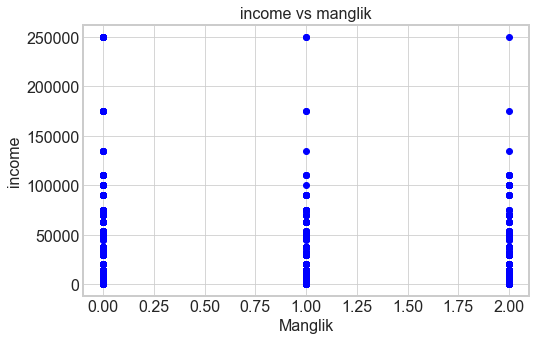

In [350]:
# your code here


z = df['manglik']


plt.figure(figsize=[8,5])
plt.scatter(z,y, c="blue", marker='o', label="train data")

plt.ylabel('income')
plt.xlabel('Manglik')
plt.title('income vs manglik')

#y_preds_train = lr_sklearn.predict(x_train.values.reshape(-1,1))
#y_preds_test = lr_sklearn.predict(x_test.values.reshape(-1,1))

plt.show()


Manglik has no effect on income 

<div class='exercise'><b> Question 6:  Calculate the Gini Index [15 pts]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset

**6.2** Compare your gini index with other countries.

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?

Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
 
 </div>

In [351]:
# your code here
top =[]
bottom = []

income_sorted = df['income'].sort_values()

n = len(income_sorted)
bottom = n*sum(income_sorted)
enum = enumerate(income_sorted)

for i,j in enum:
    top.append((2 * (i + 1) - n - 1) * j)

top_sum = sum(top)

gini = top_sum/bottom

print(gini)

0.49719966570155616


<div class='exercise-r'>  
 
**6.2** Compare your gini index with other countries.
 
 According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25.
 
 Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?
 
 Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
 
 </div>

# your code here
india has less income disparity than Ukraine, but not as good as south africa, however it is closer to south africa in terms of income disparity

<div class='exercise'><b> Question 7 (for 209a students, optional for others):  Multi-Linear Regression [10 pts]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.
</div>

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

As with all other homework problems, this is a learning exercise; in the real world, it is your decision to choose the types of data science projects you will work on as well as which clients you will work with. 

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

#### Optional Outputs
You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors


In [352]:
# your code here
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

df.head()

cols = [['education'], ['complexion'], ['status'],['bmi'], ['gender'], ['height'],['age'], ['city']]

mse_list = []

#List of all predictor combinations to fit the curve

for i in cols:
    #Set each of the predictors from the previous list as x
    x = df[i]
    
    
    #"Sales" column is the reponse variable
    y = df['income']
    
   
    #Splitting the data into train-test sets with 80% training data and 20% testing data. 
    #Set random_state as 0
    xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

    #Create a LinearRegression object and fit the model
    lreg = LinearRegression()
    lreg.fit(xtrain,ytrain)
    
    #Predict the response variable for the test set
    y_pred= lreg.predict(xtest)
    
    #Compute the MSE
    MSE = mean_squared_error(ytest,y_pred)    
    #Append the MSE to the list
    mse_list.append(MSE)
    
print(mse_list)

[247334465.44065082, 248235551.6280136, 232727794.79454017, 251065459.09362522, 245378950.75698197, 241122204.304542, 250864766.26572478, 155192976.2114605]


In [353]:
df

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,31,1,68,57,19.107,2,1,1,1,1,1,1,1,2,2,2,1,4,0,2,7500,8
3,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
4,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12350,28,1,70,41,12.969,4,2,1,1,0,1,1,1,4,3,1,0,4,0,3,50000,5
12351,28,1,63,61,23.822,2,1,1,1,0,1,1,1,3,3,2,1,4,0,2,10000,9
12352,22,0,64,50,18.921,2,1,1,2,0,0,1,1,3,2,1,1,6,1,1,417,4
12353,31,1,71,69,21.216,4,1,1,1,0,1,2,1,3,2,1,0,5,1,2,29167,1


Really not sure how we are supposed to do this without a training set of known tax evaders to get some sort of correlation and match MSEs?